# Laboratory methods: experiments, measurements and uncertainties
## Experiment no. 1 - Darcy flow through a porous medium

**Your name(s):** 

**Date:** 

---
## 1) Objective - Describe the objective of this experiment in your own words (max 150 words).

## 2) Experimental Setup (max 200 words)

## 3) Procedure - Briefly describe the procedure used to collect the data (max 200 words).

## 4) Data collection and storage
Enter paired measurements of imposed flow rate and measured pressure drop.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Enter your hydraulic head measurements in [cm]
h1 = [17.1,18.1,19.5,21.0,22.6,24.4,26.3,27.5,29.4,31.3,38.3]
h2 = [14.5,15.1,16.1,17.0,18.2,19.8,21.1,22.1,23.5,25.0,30.8]
h1 = np.array(h1, dtype=float)
h2 = np.array(h2, dtype=float)

# convert hydraulic head in [m]
h2 = h2 / 100
h1 = h1 / 100

# Enter your system physical properties [m],[s],[kg]
g = 9.81
rho = 1000
mu = 0.00089
L = 0.5
R = 0.03
dg = 0.001
A = np.pi * R**2
phi = 0.39
# KC formula prediction
K_KC = dg**2 / (180 * mu) * phi / (1 - phi)**2 * rho * g

# Enter your measured flow data below in [m3/s]
#flow = []
# flow = np.array(flow, dtype=float)
n = len(h1)
flow = np.linspace(0.00000028,0.000008,n)
q = flow / A

dh = h2 - h1
gradh = dh / L

assert flow.size == dh.size, "Flow and pressure arrays must be the same length"
assert flow.size >= 3, "Enter at least 3 data points"

df = pd.DataFrame({"Darcy velocity, [m/s]": q, "Hydraulic Head Gradient (∇h), [-]": gradh})
df

,"Darcy velocity, [m/s]","Hydraulic Head Gradient (∇h), [-]"
0,0.000099,-0.052
1,0.000372,-0.060
2,0.000645,-0.068
3,0.000918,-0.080
4,0.001191,-0.088
5,0.001464,-0.092
6,0.001737,-0.104
7,0.002010,-0.108
8,0.002283,-0.118
9,0.002556,-0.126


## 5) Show results


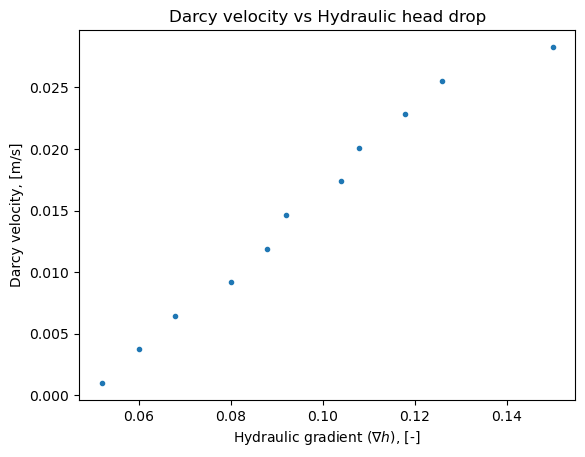

In [49]:
plt.figure()
plt.plot(- gradh,q,'.')
plt.ylabel(r"Darcy velocity, [m/s]")
plt.xlabel(r"Hydraulic gradient ($\nabla h$), [-]")
plt.title(r"Darcy velocity vs Hydraulic head drop")
plt.grid(False)
plt.show()

## 6) Data analysis

Hydraulic conductivity K = 0.0301 m/s
Hydraulic conductivity K = 0.0642 m/s
R² = 0.9784


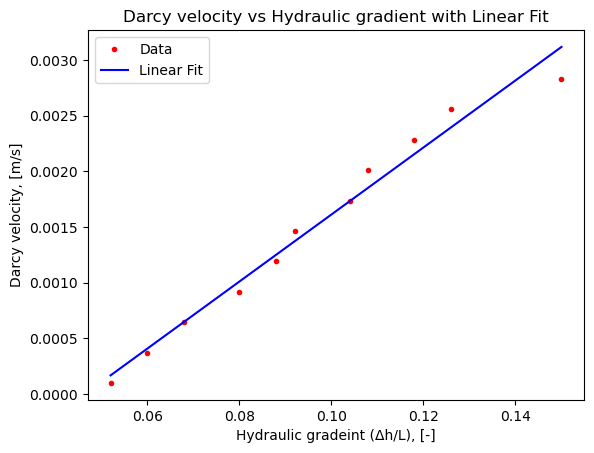

In [64]:
# Fit a linear model (Darcy's law): q = - K grad(h)
# Linear regression using NumPy only (JupyterLite compatible)
slope, intercept = np.polyfit(-gradh,q, 1)

q_pred = slope * (-gradh) + intercept

# R^2 calculation
ss_res = np.sum((q - q_pred)**2)
ss_tot = np.sum((q - np.mean(q))**2)
r2 = 1 - ss_res/ss_tot

print(f"Hydraulic conductivity K = {slope:.3g} m/s")
print(f"Hydraulic conductivity K = {K_KC:.3g} m/s")
print(f"R² = {r2:.4f}")

# Plot with fitted line
x_line = np.linspace(-gradh.min(), -gradh.max(), 20)
y_line = slope * x_line + intercept

plt.figure()
plt.plot(-gradh,q,'r.',label="Data")
plt.plot(x_line, y_line,'b-',label="Linear Fit")
plt.ylabel("Darcy velocity, [m/s]")
plt.xlabel("Hydraulic gradeint (Δh/L), [-]")
plt.title("Darcy velocity vs Hydraulic gradient with Linear Fit")
plt.legend()
plt.grid(False)
plt.show()

## 7) results discussion: comment on the items below
- Does the relationship between the data you collected (Darcy velocity and hydraulic gradient) appear linear?
- The measured value for the Hydraulic conductivity matches the prediction of the KC formula?

---
### IMPORTANT: Before closing the browser
Go to **File → Download → Notebook (.ipynb)** to save your work.
